<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/Python_Data_Analytics_Library/03_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 참고 사이트

- http://matplotlib.org
- http://seaborn.pydata.org

### 기본 그래프

    선(line), 막대(bar), 히스토그램(histogram), 산포도(scatter), 상자(box)

### 질적 데이터

- 요약 방법 : 도표
- 정리 방법 : 도수 분포표, 분할표
- 그래프 : 막대 그래프, 원 그래프, 파이 그래프, ...

### 양적 데이터

- 요약 방법 : 수치
- 정리 방법 : 산술 평균, 중앙값, ...
- 그래프 : 히스토그램, Boxplot, Scatter plot, 시계열(선) 그래프, ...

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

In [ ]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치후 런타임 다시시작

In [40]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 1. 선 그래프

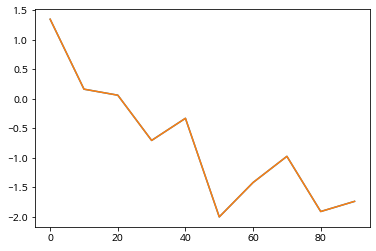

In [8]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s
s.plot()
s.plot.line()

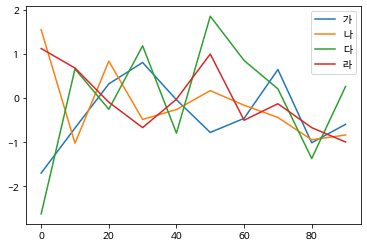

In [41]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns = ["가", "나", "다", "라"],
                   index = np.arange(0, 100, 10))
df1
df1.plot()

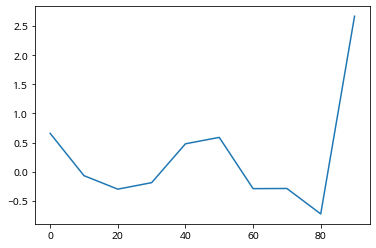

In [9]:
df1["가"].plot()

### 2. 막대 그래프

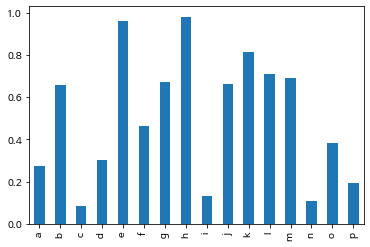

In [12]:
s2 = pd.Series(np.random.rand(16), index = list("abcdefghijklmnop"))
s2
s2.plot(kind = "bar")
s2.plot.bar()

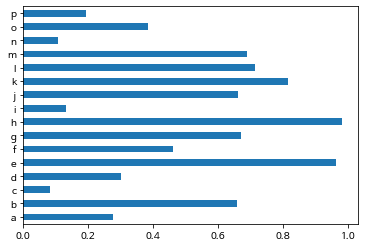

In [15]:
# 가로 바그래프
s2.plot(kind = "barh")
s2.plot.barh()

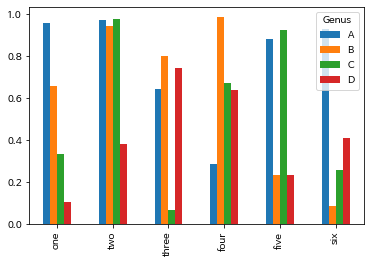

In [20]:
df2 = pd.DataFrame(np.random.rand(6, 4),
                   index = ["one", "two", "three", "four", "five", "six"],
                   columns = pd.Index(["A", "B", "C", "D"], name = "Genus"))
df2
df2.plot(kind = "bar")

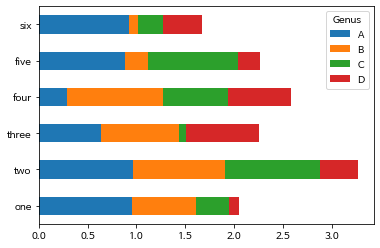

In [22]:
df2.plot(kind = "barh", stacked = True)

### 3. histogram

- X변수가 가질 수 있는 값의 범위
- 값만 필요하고 인덱스는 필요 없다

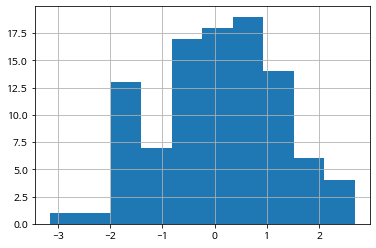

In [23]:
s = pd.Series(np.random.normal(0, 1, size = 100))
s
s.hist()

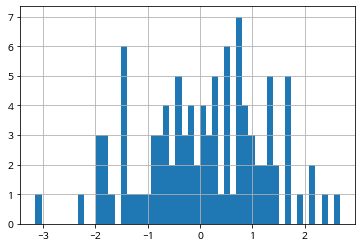

In [24]:
s.hist(bins = 50)

### 4. 산포도(산점도, Scatter Plot)

- 두 변수의 관계를 확인 : 양, 음 

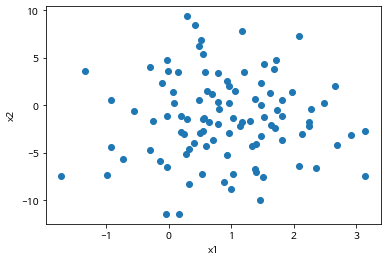

In [28]:
x1 = np.random.normal(1, 1, size = (100, 1))
x1

x2 = np.random.normal(-2, 4, size = (100, 1))
x2

x = np.concatenate((x1, x2), axis = 1)
x

df = pd.DataFrame(x, columns = ["x1", "x2"])
df

df.plot.scatter("x1", "x2")
plt.scatter(df["x1"], df["x2"])

### 5. 상자 그래프(Boxplot)

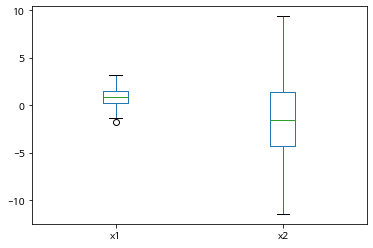

In [29]:
df.plot.box()

### 6. 활용 예제1

- seaborn 'tips' 샘플

#### 1) 데이터 준비

In [31]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'Total Bill')

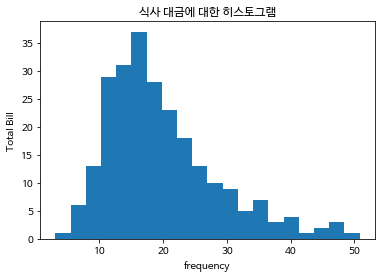

In [35]:
# tips["total_bill"].hist()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tips["total_bill"], bins = 20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

#### 3) total_bill과 tip의 관계를 알고 싶다

Text(0, 0.5, 'Tip')

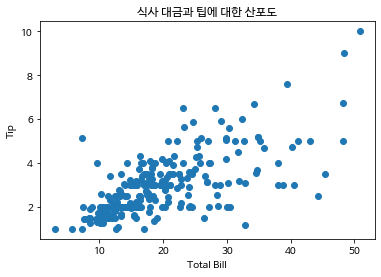

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### 4) 성별에 따른 total_bill과 tip의 관계를 알고 싶다

In [38]:
def record_sex(sex):
  if sex == "Female":
    return 0
  else:
    return 1
  
##################################################

tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

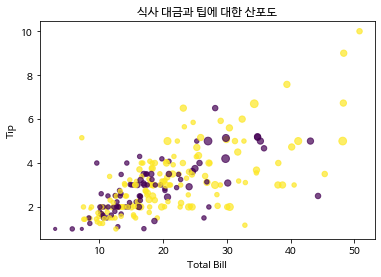

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c = tips["sex_color"], alpha = 0.7,
           s = tips["size"]*10)
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### 5) 성별과 팁의 관계

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Tip')

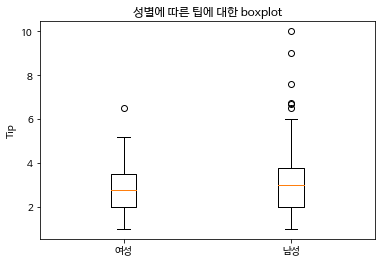

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"] == "Female"]["tip"], tips[tips["sex"] == "Male"]["tip"]],
           labels = ["여성", "남성"])
ax.set_title("성별에 따른 팁에 대한 boxplot")
ax.set_ylabel("Tip")

### 7. 활용 예제2

- 전국 신규 민간 아파트 분양가격 동향

#### 1) 데이터 준비

- https://data.go.kr/dataset/3035522/fileData.do


In [ ]:
##### 데이터 불러오기 및 확인

In [ ]:
##### column 이름을 영어로 변경하고 (city, size, year, month, price), price는 숫자로 데이터 타입 변경

In [ ]:
#### 서울만 선택해서 "전체" size만 확인

In [ ]:
##### size컬럼 삭제하고 다중 index로(year, month) 조정

In [ ]:
##### 서울지역 전체 크기별 월별 제곱미터 당 가격(천원) 변화 추이를 그래프로 출력

### 8. seaborn

In [56]:
tips = sns.load_dataset("tips")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(17.200000000000003, 0.5, 'Total Bill')

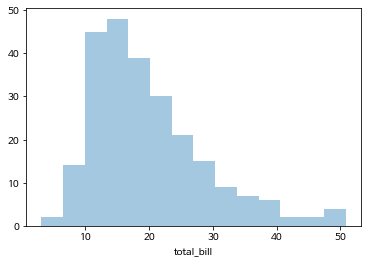

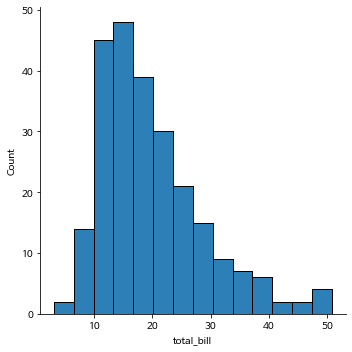

In [63]:
##### total_bill에 대한 금액 분포 확인

sns.distplot(tips["total_bill"], kde = False)
sns.displot(tips["total_bill"])
sns.histplot(tips["total_bill"])

ax.hist(tips["total_bill"], bins = 20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(17.200000000000003, 0.5, 'Total Bill')

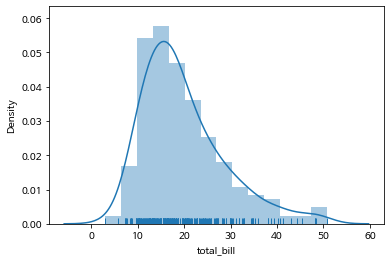

In [64]:
sns.distplot(tips["total_bill"], rug = True)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


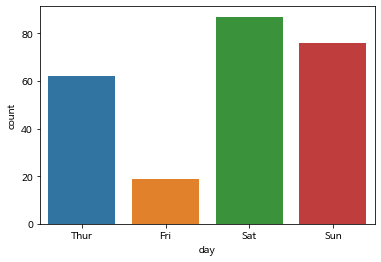

In [65]:
##### 요일별로 인원수 파악

sns.countplot("day", data = tips)

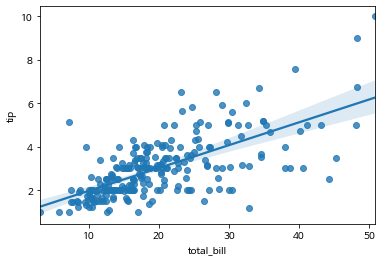

In [66]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

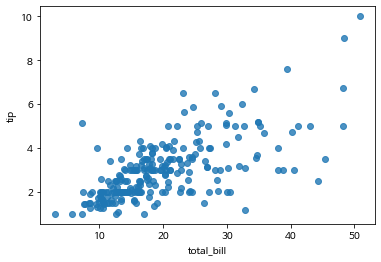

In [68]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False)

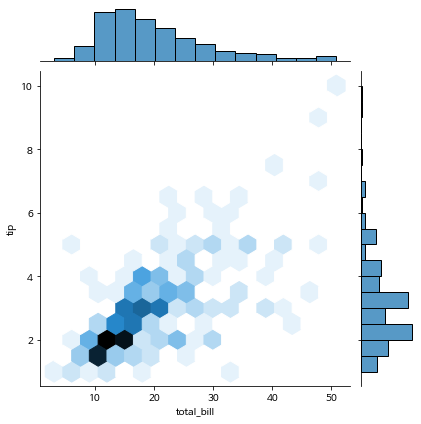

In [70]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")

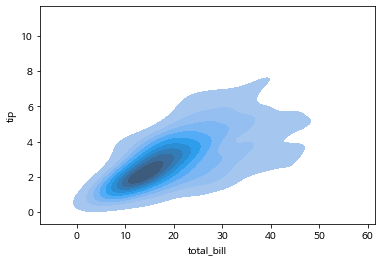

In [71]:
sns.kdeplot(x = "total_bill", y = "tip", data = tips, shade = True)

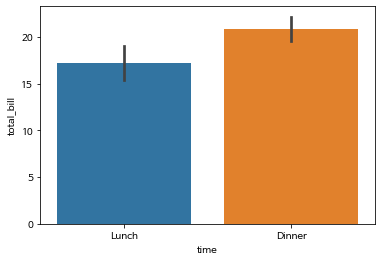

In [72]:
sns.barplot(x = "time", y = "total_bill", data = tips)

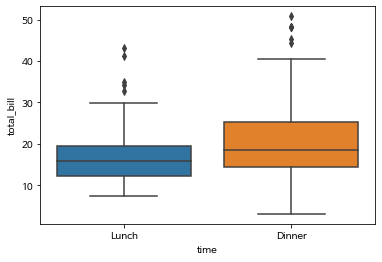

In [73]:
sns.boxplot(x = "time", y = "total_bill", data = tips)

In [ ]:
sns.boxplot(x = "time", y = "total_bill", data = tips)

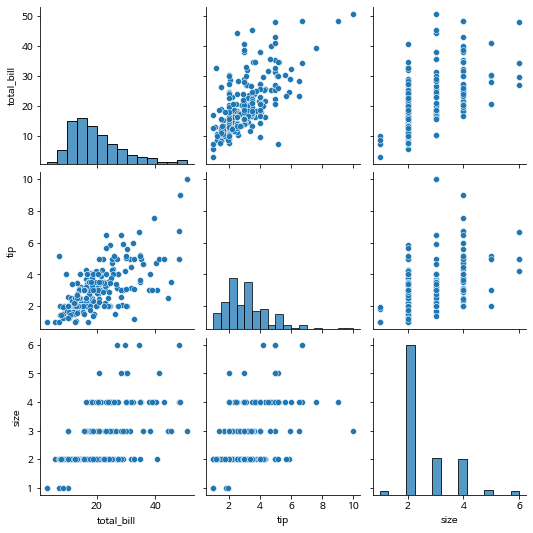

In [75]:
sns.pairplot(tips)

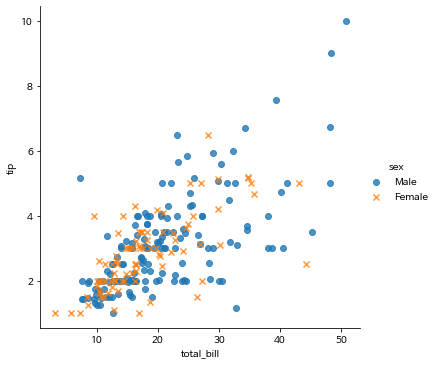

In [80]:
##### 성별에 따른 total_bill과 tip의 관계를 알고 싶다

sns.lmplot(x = "total_bill", y = "tip", data = tips, fit_reg = False, hue = "sex",
           markers = ["o", "x"])